<a href="https://colab.research.google.com/github/ovllya126/UTS_ML2019_ID13307095/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/steam_training.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners
0,1,Counter-Strike,1/11/00,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,10000000-20000000
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,5000000-10000000
2,3,Day of Defeat,1/5/03,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,5000000-10000000
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,5000000-10000000
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,5000000-10000000


In [0]:
#transform platforms
#from 'windows;mac;linux' to numbers

st.platforms = pd.Categorical(st.platforms)
st.platforms = st.platforms.cat.codes 

In [0]:
st['players'] = 0
st['VAC'] =0
st['STC'] =0
st['PCS'] =0
st['ISS'] =0
st['cloud'] =0

# 'Players','VAC','STC','PCS','ISS','Cloud'


In [40]:
def cg_class(name,cg):
  st[name] = 0
  for i in range(0,19999):
    if cg in st.categories[i]:
      st[name][i] = 1

cg_class('Player', 'Multiplayer')
cg_class('VAC', 'Valve Anti-Cheat enabled')
cg_class('STC', 'Steam Trading Cards')
cg_class('PCS', 'Partial Controller Support')
cg_class('ISS', 'Includes Source SDK')
cg_class('Cloud', 'Steam Cloud')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
import os

print(os)
print(os.getcwd())

print(os.listdir(os.getcwd()))


In [0]:

st.to_csv('st_modified1.csv')

In [3]:
st = pd.read_csv('st_modified1.csv')

st.head()

,Unnamed: 0,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners,players,VAC,STC,PCS,ISS,cloud,Player,Cloud
0,0,1,Counter-Strike,1/11/00,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,10000000-20000000,0,1,0,0,0,0,0,0
1,1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,5000000-10000000,0,1,0,0,0,0,0,0
2,2,3,Day of Defeat,1/5/03,1,Valve,Valve,5,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,5000000-10000000,0,1,0,0,0,0,0,0
3,3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,5000000-10000000,0,1,0,0,0,0,0,0
4,4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,5,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,5000000-10000000,0,1,0,0,0,0,0,0


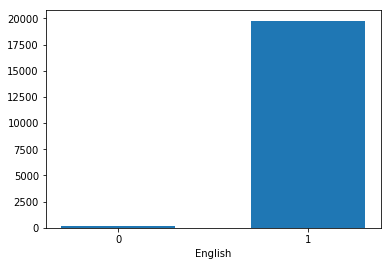

In [3]:
bins = np.arange(3) - 0.5
plt.hist(st.english, bins, rwidth = 0.6)

plt.xticks([0,1])
plt.xlabel('English')
plt.show()

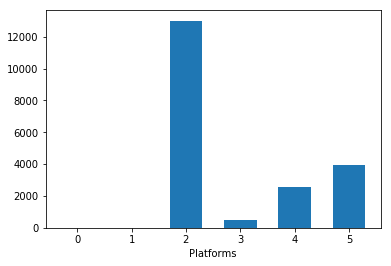

In [8]:
bins = np.arange(7) - 0.5
plt.hist(st.platforms, bins, rwidth = 0.6)

plt.xticks([0,1,2,3,4,5])
plt.xlabel('Platforms')
plt.show()

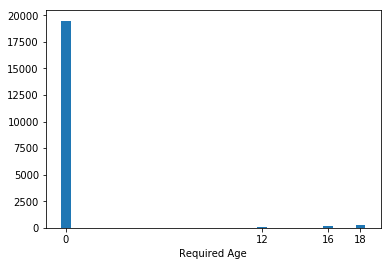

In [7]:
bins = np.arange(20) - 0.5
plt.hist(st.required_age, bins, rwidth = 0.6)
# plt.hist(st.required_age)

plt.xticks([0,12,16,18])
plt.xlabel('Required Age')
plt.show()

In [28]:
st.describe()

,Unnamed: 0,appid,english,platforms,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,players,VAC,STC,PCS,ISS,cloud,Player,Cloud
count,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,9999.500000,10000.500000,0.98935,2.87315,0.412900,41.388900,1.328045e+03,277.766900,196.116900,189.219350,6.605311,0.0,0.004700,0.388250,0.166550,0.001600,0.0,0.047050,0.299350
std,5773.647028,5773.647028,0.10265,1.24645,2.587614,317.345084,2.208055e+04,4981.099289,2098.406866,2687.030391,7.885331,0.0,0.068397,0.487364,0.372583,0.039969,0.0,0.211751,0.457985
min,0.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,4999.750000,5000.750000,1.00000,2.00000,0.000000,0.000000,1.100000e+01,4.000000,0.000000,0.000000,1.990000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,9999.500000,10000.500000,1.00000,2.00000,0.000000,9.000000,4.000000e+01,15.000000,0.000000,0.000000,4.790000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,14999.250000,15000.250000,1.00000,4.00000,0.000000,25.000000,2.040000e+02,66.000000,30.250000,31.250000,7.990000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,19999.000000,20000.000000,1.00000,5.00000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,303.990000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [8]:
def genres_class(name,genres):
  st[name] = 0
  for i in range(0,19999):
    if genres in st.genres[i]:
      st[name][i] = 1

genres_class('Action', 'Action')
genres_class('Free', 'Free to Play')
genres_class('Strategy', 'Strategy')
genres_class('Adventure', 'Adventure')
genres_class('Indie', 'Indie')
genres_class('RPG', 'RPG')
genres_class('Casual', 'Casual')
genres_class('Racing', 'Racing')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:

st.to_csv('/Users/jinyan/Desktop/ppp/st_m1.csv')

FileNotFoundError: ignored

In [0]:
st.to_csv('st_modified2.csv')